In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# df

In [ ]:
# df_t = df[[' Total Fwd Packets',
#            ' Total Backward Packets',
#            'Flow Bytes/s',
#            'Fwd Packets/s',
#            ' Bwd Packets/s',
#            ' Flow IAT Mean',
#            ' Fwd IAT Mean',
#            ' Bwd IAT Mean',
#            ' Flow IAT Std',
#            ' Fwd IAT Std',
#            ' Bwd IAT Std',
#            ' Packet Length Mean',
#            ' Packet Length Std',
#            ' Fwd Packet Length Mean',
#            ' Bwd Packet Length Mean',
#            'FIN Flag Count',
#            ' SYN Flag Count',
#            ' RST Flag Count',
#            ' PSH Flag Count',
#            ' ACK Flag Count',
#            ' Min Packet Length',
#            ' Max Packet Length',
#            ' Fwd Header Length',
#            ' Bwd Header Length']]

# df_t

In [ ]:
# label = {
#     'BENIGN': 0,
#     'DDoS': 1
# }
# df_t[' Label'] = df[' Label'].map(label)
# df_t

In [ ]:
# df2 = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")
# df2

In [ ]:
# df_t2 = df2[[' Total Fwd Packets',
#            ' Total Backward Packets',
#            'Flow Bytes/s',
#            'Fwd Packets/s',
#            ' Bwd Packets/s',
#            ' Flow IAT Mean',
#            ' Fwd IAT Mean',
#            ' Bwd IAT Mean',
#            ' Flow IAT Std',
#            ' Fwd IAT Std',
#            ' Bwd IAT Std',
#            ' Packet Length Mean',
#            ' Packet Length Std',
#            ' Fwd Packet Length Mean',
#            ' Bwd Packet Length Mean',
#            'FIN Flag Count',
#            ' SYN Flag Count',
#            ' RST Flag Count',
#            ' PSH Flag Count',
#            ' ACK Flag Count',
#            ' Min Packet Length',
#            ' Max Packet Length',
#            ' Fwd Header Length',
#            ' Bwd Header Length']]

# df_t2

In [ ]:
# labels = {
#     'BENIGN': 0,
#     'DoS slowloris': 1,
#     'DoS Slowhttptest': 1,
#     'DoS Hulk': 1,
#     'DoS GoldenEye': 1,
#     'Heartbleed': 2
# }
# df_t2[' Label'] = df2[' Label'].map(labels)
# df_t2

In [ ]:
# df_t2[' Label'].value_counts()

In [ ]:
# df_final = pd.concat([df_t, df_t2], axis=0)
# df_final = df_final.dropna()

In [ ]:
# df_final[' Label'].value_counts()

In [ ]:


# sample_fraction = 0.3

# df_reduced, _ = train_test_split(df_final, test_size=1-sample_fraction, stratify=df_final[' Label'])


# df_reduced


In [ ]:
# df_reduced[' Label'].value_counts()

In [ ]:
# df_reduced.drop(df_reduced[df_reduced[' Label'] == 2].index, inplace = True)
# df_reduced

In [ ]:
# df_reduced[' Label'].value_counts()

In [ ]:
# df_reduced.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_reduced.dropna(inplace=True)

# # Assuming df_reduced is your DataFrame with 24 features and 'Label' as the target column
# # Split into features (X) and labels (y)
# X = df_reduced.drop(columns=[' Label'])
# y = df_reduced[' Label']

# # Split the dataset into training and testing sets (e.g., 80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Begining of data preprocessing code added by Ahmad
df1 = pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")
df = pd.concat([df1, df2], axis=0)

df.columns = df.columns.str.strip() # Removes unnecessary white space from column names

label = {   # Labelling the target variable with numeric values
    'BENIGN': 0,
    'DDoS': 1,
    'DoS slowloris': 1,
    'DoS Slowhttptest': 1,
    'DoS Hulk': 1,
    'DoS GoldenEye': 1,
    'Heartbleed': 2
}

df['Label'] = df['Label'].map(label) # mapping the labels to their numeric values in df

df = df.dropna() # Removing rows that contain NaN values in df
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)] # Removing rows that contain inf values in df
df = df.loc[:, (df != 0).any(axis=0)] # Removing columns that only contain 0s in df
df.drop(df[df['Label'] == 2].index, inplace = True) # Removing the Heartbleed data (only 11 present)

def replace_port_numbers(x):
     return 1 if x == 80 else 0

df['Destination Port'] = df['Destination Port'].apply(replace_port_numbers)

X = df.drop(columns=['Label'])
y = df['Label']

correlations = abs(X.corrwith(pd.Series(y)))
correlations = correlations.sort_values(ascending=False)
X = X.drop(correlations.index[25:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# End of data preprocessing code added by Ahmad


In [ ]:
# Standardize the features (important for ANN performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple ANN model using Keras
model = Sequential()

# Input layer with 24 features and two hidden layers
model.add(Dense(64, input_dim=25, activation='relu'))  # Hidden layer 1
model.add(Dense(32, activation='relu'))                # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))              # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model (with validation split of 10%)
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10, batch_size=64, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test data
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9882 - loss: 0.0360 - val_accuracy: 0.9967 - val_loss: 0.0140
Epoch 2/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9973 - val_loss: 0.0103
Epoch 3/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.9972 - val_loss: 0.0099
Epoch 4/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9970 - loss: 0.0102 - val_accuracy: 0.9975 - val_loss: 0.0093
Epoch 5/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9975 - val_loss: 0.0094
Epoch 6/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.9975 - val_loss: 0.0091
Epoch 7/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9976 - val_loss: 0.0080
Epoch 8/10
10318/10318 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 

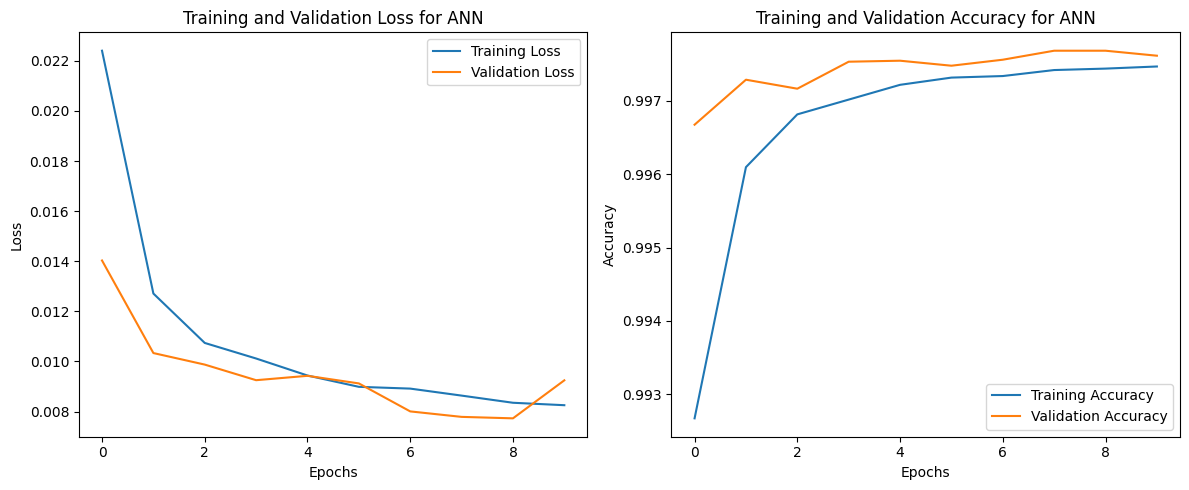

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is the History object returned by model.fit()
# Plotting training & validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for ANN')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for ANN')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Assuming `y_test` are the true labels and `y_pred` are the predicted labels
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS'])
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for ANN')
# plt.show()

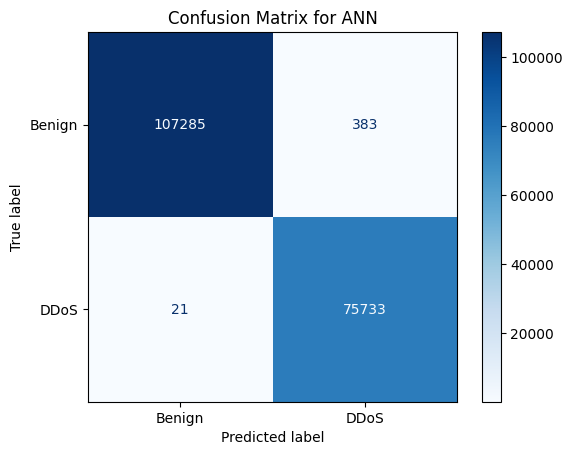

In [ ]:
#Beginning of Confusion Matrix: Yesha Modi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Filter predictions and true labels to include only Benign (0) and DDoS (1)
y_test_binary = y_test[y_test.isin([0, 1])]
y_pred_binary = y_pred[np.isin(y_test, [0, 1])].flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for ANN")
plt.show()
#Ending of Confusion Matrix: Yesha Modi

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107668
           1       0.99      1.00      1.00     75754

    accuracy                           1.00    183422
   macro avg       1.00      1.00      1.00    183422
weighted avg       1.00      1.00      1.00    183422

